![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

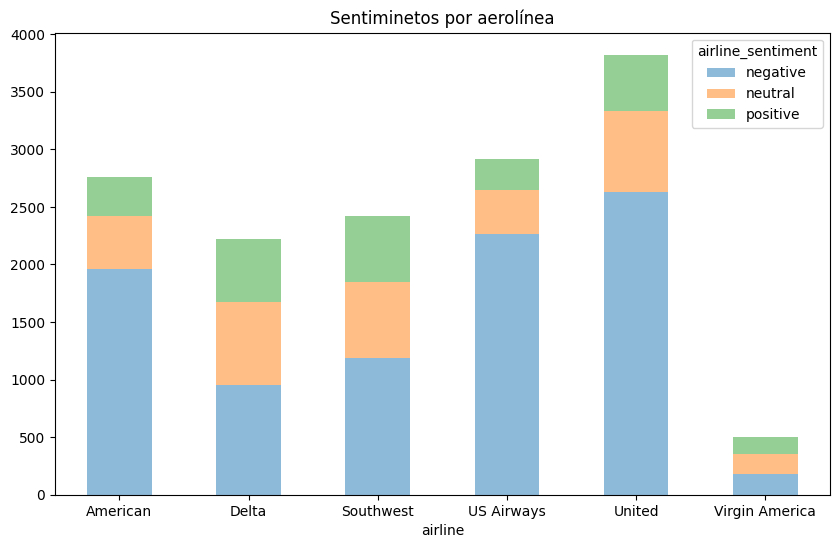

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
from nltk import word_tokenize
import nltk
! pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.1 MB/s eta 0:00:00


In [10]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [11]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 1
## Transformar datos usanso CountVectorizer
vec = CountVectorizer()
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

print("X_train_vec Shape: ", X_train_vec.shape)

X_train_vec Shape:  (9808, 12056)


In [13]:
## Calibrar el modelo usando BayesianSearch()
def CalibrarModelo_BYS(XTrain, yTrain, scoring='accuracy', n_iter=50):
    param_grid = {
        'max_features': Integer(1, 1000), #['log2', 'sqrt'], #['auto', 'sqrt', 'log2'],
        'max_depth': (5, 500), #Integer(5, 300),  # Valores para probar max_depth
        'n_estimators': Integer(500, 3000), #[x * 100 for x in range(5, 15)]
        'min_samples_leaf': Integer(1, 100)
    }

    model = RandomForestClassifier(random_state=0)
    grid_search = BayesSearchCV(estimator=model,  search_spaces=param_grid, n_iter=n_iter, cv=2, scoring=scoring, n_jobs=-1, verbose=3)
    grid_search.fit(XTrain, yTrain)

    print("Mejores parámetros:", grid_search.best_params_)
    print("Mejor score de validación cruzada (accuracy):", grid_search.best_score_)

    return (grid_search.best_params_, grid_search.best_score_)

#calibrar_modelo = CalibrarModelo_BYS(X_train_vec, y_train, n_iter=20)

#Mejores parámetros: OrderedDict([('max_depth', 11), ('max_features', 'log2'), ('n_estimators', 800)])
#Mejor score de validación cruzada (accuracy): 0.6212275693311582

#Mejores parámetros: OrderedDict([('max_depth', 296), ('max_features', 556), ('min_samples_leaf', 1), ('n_estimators', 500)])
#Mejor score de validación cruzada (accuracy): 0.7435766721044046

#Mejores parámetros: OrderedDict([('max_depth', 20), ('max_features', 1000), ('min_samples_leaf', 1), ('n_estimators', 500)])
#Mejor score de validación cruzada (accuracy): 0.7202283849918434

In [14]:
# Crear el modelo con los mejores parámetros encontrados.
modelo = RandomForestClassifier(random_state=0, max_depth=296, max_features=556, min_samples_leaf=1, n_estimators=500)

# Aplicar validación cruzada y calcular métrica de desempeño del modelo
cv_scores = cross_val_score(modelo, X_train_vec, y_train, cv=2, scoring='accuracy')
accuracy_mean = cv_scores.mean()
print("Accuracy promedio en train CV=2", accuracy_mean)

modelo.fit(X_train_vec, y_train)
y_pred_test = modelo.predict(X_test_vec)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Accuracy del modelo en los datos de prueba: {test_accuracy}")

# Estimar la complejidad del modelo creado
trees = modelo.estimators_
depths = [tree.tree_.max_depth for tree in trees]
average_depth = sum(depths) / len(depths)
print("Profunidad promedio de los árboles: ", average_depth)

leaf_counts = [tree.tree_.n_leaves for tree in trees]
average_leaf_count = sum(leaf_counts) / len(leaf_counts)

print("Promedio de nodos terminales: ", average_leaf_count)

# Guardar resultados
averages_accuracy, averages_depth, averages_leaf, models_name = [], [], [], []
averages_accuracy.append(test_accuracy)
averages_depth.append(average_depth)
averages_leaf.append(average_leaf_count)
models_name.append('CountVectorizer')

Accuracy promedio en train CV=2 0.7435766721044046
Accuracy del modelo en los datos de prueba: 0.7711092715231788
Profunidad promedio de los árboles:  151.128
Promedio de nodos terminales:  2487.716


**Descripción del procedimiento**
> * Se realiza la transformación de los datos usanso CountVectorizer, tanto para los datos de entrenamiento como pruebas.
> * Se calibra el modelo de predicción RandomForestClassifier utilizando la técnica de BayesSearchCV para los párametros 'max_features', 'max_depth', 'n_estimators', 'min_samples_leaf’; utilizando validación cruzada (CV=2) y entre 10 y 20 iteracciones para encontrar el mejor modelo. Utilizamos CV=2 en este y en los procesos subsecuentes con el objeto de realizar la validación cruzada, sin incurrir en mayor demanda computacional y reducir el tiempo de entrenamiento de los modelos, a fin de no afectar el tiempo de ejecución de este taller.
> * Se ejecuta el modelo de calibración en al menos tres ocasiones con rangos diferentes en cada uno de los parámetros. Los mejores parámetros encontrados fueron: max_depth=296, max_features=556, min_samples_leaf=1, n_estimators=500
> * Se crea la instancia del modelo de RandomForest con los mejores parámetros encontrados, se entrena el modelo usando cross validation, se obtienen las predicciones en los datos de pruebas, y se calcula la exactitud de estas.
> * Se realiza la estimación de la profundidad y el número de nodos promedio de los árboles, encontrando que se crea un modelo de árboles muy complejo con una profundidad promedio mayor a 150 y más de 2400 nodos terminales.

**Conclusiones**
> + La transformación de los datos crea 12056 predictores.
> + En los datos de entrenamiento la precisión obtenida fue menor a la obtenida en los datos de prueba lo que es un indicador indirecto de que el modelo no se sobreajusto.
> + La precisión del modelo en los datos de prueba fue de 0.7711, es decir que el modelo acierta el 77% de las clases predichas.
> + En este set de datos, con la transformación aplicada y para este modelo de predicción, el parámetro con mayor incidencia en el poder predictivo del modelo fue la profundidad de los árboles, lo cual evidenciamos cuando limitamos el rango de este parámetro en el espacio de busqueda.

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 2
vec_stop = CountVectorizer(stop_words='english')

X_train_vec_stop = vec_stop.fit_transform(X_train)
X_test_vec_stop= vec_stop.transform(X_test)

print('Palabras elminadas: ', vec_stop.get_stop_words())
print('X_train_vec_stop Shape:', X_train_vec_stop.shape)


Palabras elminadas:  frozenset({'neither', 'back', 'being', 'any', 'sometime', 'front', 'hereafter', 'wherever', 'formerly', 'same', 'from', 'less', 'into', 'per', 'get', 'thin', 'con', 'name', 'empty', 'becomes', 'has', 'why', 'cant', 'whoever', 'everything', 'became', 'herself', 'anyhow', 'above', 'onto', 'would', 'and', 'still', 'between', 'un', 'another', 'against', 'because', 'so', 'always', 'been', 'take', 'sometimes', 'ever', 'of', 'both', 'latter', 'in', 'indeed', 'eleven', 'its', 'much', 'off', 'twenty', 'sixty', 'towards', 'themselves', 'across', 'describe', 'herein', 'there', 'somewhere', 'yet', 'around', 'here', 'therein', 'however', 'amongst', 'move', 'whether', 'those', 'thus', 'must', 'can', 'put', 'call', 'hers', 'seems', 'without', 'eg', 'full', 'itself', 'whom', 'ltd', 'out', 'other', 'the', 'although', 'me', 'yours', 'nor', 'seem', 'thereafter', 'whereafter', 'fill', 'should', 'others', 'alone', 'namely', 'or', 'six', 'yourself', 'often', 'below', 'own', 'not', 'thou

In [16]:
## Calibrar el modelo con los nuevos predictores
#calibrar_modelo = CalibrarModelo_BYS(X_train_vec_stop, y_train, n_iter=20)

#Mejores parámetros: OrderedDict([('max_depth', 301), ('max_features', 500), ('min_samples_leaf', 4), ('n_estimators', 2709)])
#Mejor score de validación cruzada (accuracy): 0.7166598694942904

#Mejores parámetros: OrderedDict([('max_depth', 71), ('max_features', 452), ('min_samples_leaf', 4), ('n_estimators', 700)])
#Mejor score de validación cruzada (accuracy): 0.7149265905383361

#Mejores parámetros: OrderedDict([('max_depth', 427), ('max_features', 977), ('min_samples_leaf', 2), ('n_estimators', 900)])
#Mejor score de validación cruzada (accuracy): 0.7229812398042414

In [30]:
####
# Crear el modelo con los mejores parámetros encontrados.
modelo = RandomForestClassifier(random_state=0, max_depth=427, max_features=977, min_samples_leaf=2, n_estimators=900)

# Aplicar validación cruzada y calcular métrica de desempeño del modelo
cv_scores = cross_val_score(modelo, X_train_vec_stop, y_train, cv=2, scoring='accuracy')
accuracy_mean = cv_scores.mean()
print("Accuracy promedio en train CV=2:", accuracy_mean)

modelo.fit(X_train_vec_stop, y_train)
y_pred_test = modelo.predict(X_test_vec_stop)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Accuracy del modelo en los datos de prueba: {test_accuracy}")

# Estimar la complejidad del modelo creado
trees = modelo.estimators_
depths = [tree.tree_.max_depth for tree in trees]
average_depth = sum(depths) / len(depths)
print("Profunidad promedio de los árboles: ", average_depth)

leaf_counts = [tree.tree_.n_leaves for tree in trees]
average_leaf_count = sum(leaf_counts) / len(leaf_counts)

print("Promedio de nodos terminales: ", average_leaf_count)

# Guardar resultados
averages_accuracy.append(test_accuracy)
averages_depth.append(average_depth)
averages_leaf.append(average_leaf_count)
models_name.append('Delete stopwords')

Accuracy promedio en train CV=2: 0.7229812398042414
Accuracy del modelo en los datos de prueba: 75.0207%
Profunidad promedio de los árboles:  200.54777777777778
Promedio de nodos terminales:  1126.9933333333333


**Descripción del procedimiento**
> + Se realiza la transformación de los datos de entrenamiento y pruebas eliminando las *'stopwords'* con la función *CountVectorizer*, y se presentan las palabras eliminadas.  
> + Se calibra el modelo usando la misma técnica del punto anterior, y los nuevos predictores. Los mejores parámetros encontrados fueron: max_depth=427, max_features=977, min_samples_leaf=2, n_estimators=900
> + Se crea el nuevo modelo con estos parámetros y se entrena el modelo usando cross validation, se obtienen las predicciones en los datos de pruebas, y se calcula la exactitud de estas.
> + Se realiza la estimación de la profundidad y el número de nodos promedio de los árboles, encontrando que se crea un modelo de árboles menos complejo que el modelo anterior con una profundidad promedio de 200 y más de 1100 nodos terminales.

**Conclusiones**
> + La transformación de los datos crea 11777 predictores; este es un número menor que la transformación obtenida sin eliminar *'stopwords'*, lo que contribuye a disminuir la complejidad del modelo de predicción.
> + La métrica de desempeño del modelo muestra una exactitud de 0.7502 menor a la encontrada con el modelo sin elimnar *'stopwords'*, esto podría deberse a que en textos cortos como lo son los tweets las *'stopwords'* contendrían información importante. Llama la atención que se eliminaron palabras que representan números, y algunas relacionadas con el verbo 'to be' y 'can', entre otras que podrían contener información relacionada con el sentimiento.
> + Por otro lado los nuevos preditores permiten encontrar una calibración que  disminuye la complejidad del modelo, generando árboles con menor profundidad y menor número de nodos terminales en comparación con el modelo de transformación sin eliminación de *'stopwords'*.
> + Llama la atención que la métrica de desemepeño es mejor en los datos de prueba que en los de entrenamiento, pudiendo este ser un indicador indirecto de que el modelo no se esta sobreajustando.


### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [20]:
# Celda 3
nltk.download('punkt')
nltk.download('wordnet')

lematizador = WordNetLemmatizer()

def lematizar_texto(texto):
    return [lematizador.lemmatize(word, pos='v') for word in word_tokenize(texto)]

vec_lemat = CountVectorizer(tokenizer=lematizar_texto)
X_train_vec_2 = vec_lemat.fit_transform(X_train)
X_test_vec_2 = vec_lemat.transform(X_test)

print('X_train_vec_2 Shape:', X_train_vec_2.shape)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


X_train_vec_2 Shape: (9808, 12060)


In [21]:
## Calibrar el modelo con los nuevos predictores
#calibrar_modelo = CalibrarModelo_BYS(X_train_vec_2, y_train, n_iter=20)

#Mejores parámetros: OrderedDict([('max_depth', 487), ('max_features', 1000), ('min_samples_leaf', 15), ('n_estimators', 3000)])
#Mejor score de validación cruzada (accuracy): 0.7201264274061989

#Mejores parámetros: OrderedDict([('max_depth', 350), ('max_features', 323), ('min_samples_leaf', 1), ('n_estimators', 600)])
#Mejor score de validación cruzada (accuracy): 0.7572389885807504

In [23]:
####
# Crear el modelo con los mejores parámetros encontrados.
modelo = RandomForestClassifier(random_state=0, max_depth=350, max_features=323, min_samples_leaf=1, n_estimators=600)

# Aplicar validación cruzada y calcular métrica de desempeño del modelo
cv_scores = cross_val_score(modelo, X_train_vec_2, y_train, cv=2, scoring='accuracy')
accuracy_mean = cv_scores.mean()
print("Accuracy promedio en train CV=2:", accuracy_mean)

modelo.fit(X_train_vec_2, y_train)
y_pred_test = modelo.predict(X_test_vec_2)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Accuracy del modelo en los datos de prueba: {test_accuracy}")

# Estimar la complejidad del modelo creado
trees = modelo.estimators_
depths = [tree.tree_.max_depth for tree in trees]
average_depth = sum(depths) / len(depths)
print("Profunidad promedio de los árboles: ", average_depth)

leaf_counts = [tree.tree_.n_leaves for tree in trees]
average_leaf_count = sum(leaf_counts) / len(leaf_counts)

print("Promedio de nodos terminales: ", average_leaf_count)

# Guardar resultados
averages_accuracy.append(test_accuracy)
averages_depth.append(average_depth)
averages_leaf.append(average_leaf_count)
models_name.append('Lemmatizer')

Accuracy promedio en train CV=2: 0.7572389885807504
Accuracy del modelo en los datos de prueba: 78.5389%
Profunidad promedio de los árboles:  123.04333333333334
Promedio de nodos terminales:  2895.4166666666665


**Descripción del procedimiento**
> + Se realiza la transformación de los datos de entrenamiento y pruebas lematizndo el texto con verbos con la función *CountVectorizer* y el metodo *WordNetLemmatizer*.  
> + Se calibra el modelo usando la misma técnica del punto anterior, y los nuevos predictores. Los mejores parámetros encontrados fueron: max_depth=350, max_features=323, min_samples_leaf=1, n_estimators=600
> + Se crea el nuevo modelo con estos parámetros y se entrena el modelo usando cross validation, se obtienen las predicciones en los datos de pruebas, y se calcula la exactitud de estas.
> + Se realiza la estimación de la profundidad y el número de nodos promedio de los árboles, encontrando que se crea un modelo de árboles menos complejo que el modelo anterior con una profundidad promedio cercana a 123 y cerca de 2900 nodos terminales.  

**Conclusiones**
> + La transformación de los datos crea 12060 predictores; siendo este un numero similar que la transformación obtenida sin eliminar *'stopwords'*.
> + El desempeño predictivo de este modelo medido a través del Accuracy es de 0.785389, indicando que el modelo acierta en el 78% de sus predicciones, siendo este un desempeño ligeramente superior al obtenido en el modelo base del punto 1 y superior al modelo de eliminación de *'stopwords'*.
> + Al igual que en los modelos anteriores la comparación entre las predicciones de entrenamiento y prueba no evidencian que el modelo se este sub o sobreajustando.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [28]:
# Celda 4
vec_lemat_4 = CountVectorizer(stop_words='english', tokenizer=lematizar_texto)
X_train_vec_4 = vec_lemat_4.fit_transform(X_train)
X_test_vec_4 = vec_lemat_4.transform(X_test)
print('X_train_vec_4 Shape:', X_train_vec_4.shape)

X_train_vec_4 Shape: (9808, 11798)


In [25]:
## Calibrar el modelo con los nuevos predictores
#calibrar_modelo = CalibrarModelo_BYS(X_train_vec_4, y_train, n_iter=20)

#Mejores parámetros: OrderedDict([('max_depth', 500), ('max_features', 482), ('min_samples_leaf', 1), ('n_estimators', 3000)])
#Mejor score de validación cruzada (accuracy): 0.7491843393148451

#Mejores parámetros: OrderedDict([('max_depth', 346), ('max_features', 691), ('min_samples_leaf', 2), ('n_estimators', 1000)])
#Mejor score de validación cruzada (accuracy): 0.75163132137031


In [31]:
####
# Crear el modelo con los mejores parámetros encontrados.
modelo = RandomForestClassifier(random_state=0, max_depth=346, max_features=691, min_samples_leaf=2, n_estimators=1000)

# Aplicar validación cruzada y calcular métrica de desempeño del modelo
cv_scores = cross_val_score(modelo, X_train_vec_4, y_train, cv=2, scoring='accuracy')
accuracy_mean = cv_scores.mean()
print("Accuracy promedio en train CV=2:", accuracy_mean)

modelo.fit(X_train_vec_4, y_train)
y_pred_test = modelo.predict(X_test_vec_4)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Accuracy del modelo en los datos de prueba: {test_accuracy}")

# Estimar la complejidad del modelo creado
trees = modelo.estimators_
depths = [tree.tree_.max_depth for tree in trees]
average_depth = sum(depths) / len(depths)
print("Profunidad promedio de los árboles: ", average_depth)

leaf_counts = [tree.tree_.n_leaves for tree in trees]
average_leaf_count = sum(leaf_counts) / len(leaf_counts)

print("Promedio de nodos terminales: ", average_leaf_count)

# Guardar resultados
averages_accuracy.append(test_accuracy)
averages_depth.append(average_depth)
averages_leaf.append(average_leaf_count)
models_name.append('Multiple Tech')

Accuracy promedio en train CV=2: 0.7493882544861338
Accuracy del modelo en los datos de prueba: 76.7384%
Profunidad promedio de los árboles:  93.374
Promedio de nodos terminales:  1033.04


**Descripción del procedimiento**
> + Se realiza la transformación de los datos de entrenamiento y pruebas lematizndo el texto con verbos con la función *CountVectorizer* y el metodo *WordNetLemmatizer*.  
> + Se calibra el modelo usando la misma técnica del punto anterior, y los nuevos predictores. Los mejores parámetros encontrados fueron: max_depth=346, max_features=691, min_samples_leaf=2, n_estimators=1000
> + Se crea el nuevo modelo con estos parámetros y se entrena el modelo usando cross validation, se obtienen las predicciones en los datos de pruebas, y se calcula la exactitud de estas.
> + Se realiza la estimación de la profundidad y el número de nodos promedio de los árboles, encontrando que se crea un modelo de árboles menos complejo que el modelo anterior con una profundidad promedio de 93 y cerca de 1000 nodos terminales.  

**Conclusiones**
> + La transformación de los datos crea 11798 predictores; siendo este un numero similar que la transformación obtenida sin eliminar *'stopwords'*.
> + El desempeño predictivo de este modelo medido a través del Accuracy es de 0.767384, indicando que el modelo acierta en el 76% de sus predicciones, siendo este un desempeño ligeramente superior al obtenido con modelo de eliminación de *'stopwords'*, e inferior al obtenido con el modelo de lematización.

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

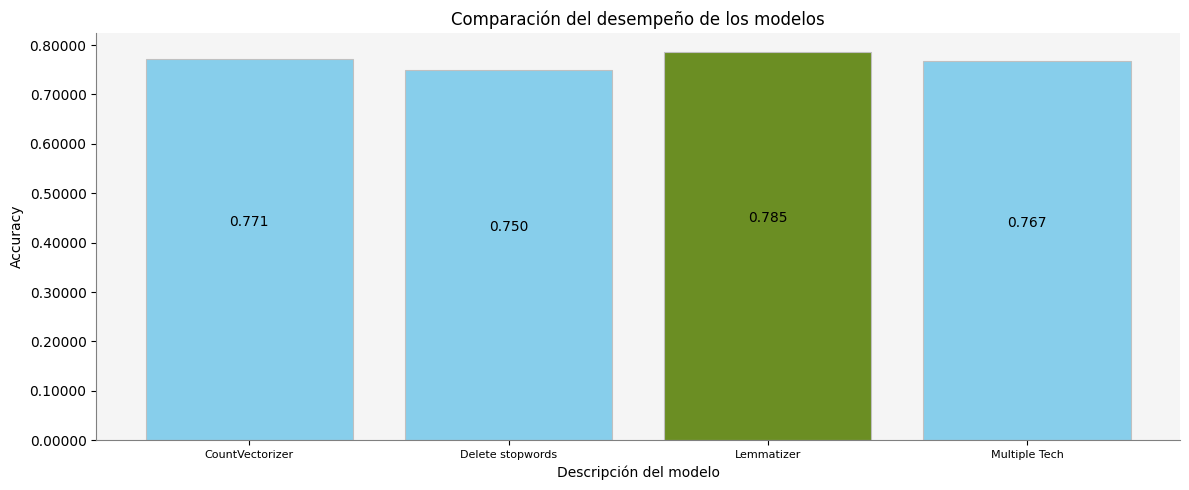

In [47]:
# Celda 5
def compararModelos(models, data, score):
    better = max(data)
    colores = ['#87CEEB' if value != better else '#6B8E23' for value in data]
    fig, ax = plt.subplots(figsize=(12,5))
    bar = ax.bar(models, data, linewidth=0.8, color=colores, edgecolor="silver")
    ax.set_title("Comparación del desempeño de los modelos")
    ax.set_xlabel("Descripción del modelo")
    ax.set_ylabel(score)
    bar_labels = [f'{value:.3f}' for value in data]
    ax.bar_label(bar, bar_labels, label_type='center', padding=20)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_facecolor("whitesmoke")
    ax.spines["left"].set_color("gray")
    ax.spines["bottom"].set_color("gray")
    ax.tick_params(axis='x', labelsize=8)
    plt.gca().yaxis.set_major_formatter('{:,.5f}'.format)
    plt.tight_layout()
    plt.show()

modelos = models_name
accuracys = averages_accuracy

compararModelos(modelos, accuracys, "Accuracy")

**Análisis y conclusiones**
> + Al comparar el poder predictivo de los modelos probados con la métrica *Accuracy* el menor desempeño fue obtenido por el modelo que elimina las *'stopwords'* usando el método incluido en 'CountVectorizer', es posible que las palabras asociadas a cantidades y los verbos 'to be' y 'can' que fueron eliminadas en el contexto del dataset analizado puedan contener información valiasa para la clasificación del sentimiento, y por ello su eliminación disminuye el porder precitivo del modelo.
> +  Por otro lado el mayor desempeño se logro con el modelo de 'lematización', mientras que el modelo que combina todas las técnicas pierde poder predictivo, probablemente por lo mencionado en el punto anterior.
> +  Cualquiera de las técnicas de procesamiento de lenguaje natural probadas conlleva a la construcción un modelo predictivo muy complejo con una gran cantidad de predictores, y en consecuencia árboles densos, muy profundos y con cientos de nodos terminales.

**Ventajas y desventajas**
> **Eliminación de stopwords:**
> > **Ventajas:** A través de la eliminación de stopwords se eliminan palabras muy repetitivas y con poca información  predictiva, como conectores y artículos, por lo que el análisis se limita solo a aquellas palabras con alta mayor información explicativa.
> >
> > **Desventajas:** En algunos contextos existen stopwords que pueden brindar información predictiva para el análisis de texto y la eliminación de las mismas puede hacer que se pierda contexto o significado de frases. Por ejemplo, en este contexto, los tweets tienden a ser cortos, por lo que la eliminación de las stopwords hacen que sean muy pocas las palabras extraídas de cada tweet.

> **Lematización:**
> > **Ventajas:** Asimismo, a través de la lematización de palabras se transforman los verbos a su estructura de diccionario, lo que hace que todas las distintas formas gramaticales de los verbos se tomen en cuenta como una misma, esto hace que se reduzca la dimensionalidad y facilita la agrupación de palabras relacionadas. En este contexto puntual fue un buen ejercicio lematizar para reducir la dimensionalidad y el ruido generado por las distintas formas gramaticales de los verbos que no brindan información para la predicción de sentimientos en los tweets
> >
> > **Desventajas:** Al lematizar se pierde la estructura gramatical original de las palabras lematizadas (en este caso los verbos), en casos donde la morfología de las palabras es importante esto puede llevar a perdida de contexto y llevar a predicciones erróneas por parte del algoritmo. El proceso de lematización es más costoso computacionalmente, ya que emplea diccionarios pre cargados en las librerías para generar el homólogo de diccionario de cada verbo, lo que implica una búsqueda exhaustiva de cada verbo en el diccionario. Esto añade un paso adicional a los demás algoritmos y es uno de los más costosos computacionalmente, incluso por encima del stemming.
